In [194]:
import pandas as pd
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import xgboost as xgb

In [206]:
df = pd.read_csv('heart_(1).csv')

### Theres some missing values in max heart rate, and the oldpeak -99 min value seems to be unusual, chest pain type and thal are categorical variable so need to address that with one hot encoding

In [65]:
df.describe()

,age,sex,chest pain type,resting blood pressure,chol,fasting blood sugar,resting ECG,max heart rate,exang,oldpeak,slope,number vessels flourosopy,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,274.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.978102,0.326733,-6.617723,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.767327,0.469794,26.828542,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,-99.990000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,136.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.750000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Here we can see alot of erroneous values at -99, these need to be removed

/Users/maxaldous/miniforge3/envs/heartenv/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='oldpeak', ylabel='Density'>

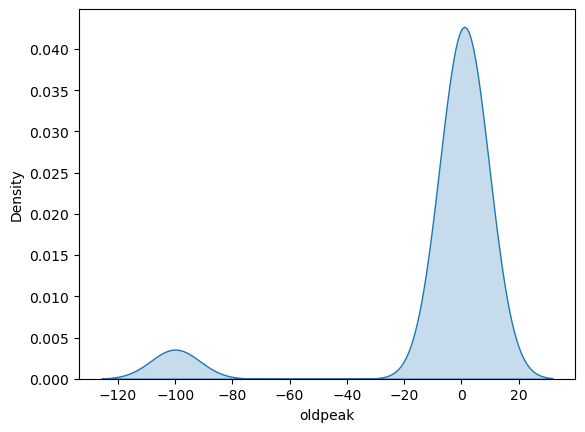

In [66]:
sns.kdeplot(df['oldpeak'], fill=True)

Seems like all the NA values occour in the max heart rate column as expected from above, 29 rows with NA values

In [67]:
print(df.loc[df.isna().any(axis = 1)].shape)

df.loc[df.isna().any(axis = 1)]

(29, 14)


,age,sex,chest pain type,resting blood pressure,chol,fasting blood sugar,resting ECG,max heart rate,exang,oldpeak,slope,number vessels flourosopy,thal,target
2,41,0,1,130,204,0,0,NaN,0,1.40,2,0,2,1
28,65,0,2,140,417,1,0,NaN,0,0.80,2,1,2,1
29,53,1,2,130,197,1,0,NaN,0,1.20,0,0,2,1
34,51,1,3,125,213,0,0,NaN,1,1.40,2,1,2,1
36,54,0,2,135,304,1,1,NaN,0,-99.99,2,0,2,1
62,52,1,3,118,186,0,0,NaN,0,0.00,1,0,1,1
82,60,0,2,102,318,0,1,NaN,0,-99.99,2,1,2,1
88,54,0,2,110,214,0,1,NaN,0,1.60,1,0,2,1
109,50,0,0,110,254,0,0,NaN,0,0.00,2,0,2,1
118,46,0,1,105,204,0,1,NaN,0,0.00,2,0,2,1


In [68]:
def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    A function to clean the df by removing NA values from all columns and negative values from the oldpeak columns

    Args:
        df (pd.DataFrame): An unclean data frame

    Returns:
        pd.DataFrame: A clean data frame
    """

    cleaned_df = df.dropna()

    cleaned_df = cleaned_df.loc[cleaned_df['oldpeak'] >= 0, : ]
    
    return cleaned_df.reset_index(drop = True)

cleaned_df = clean_df(df)

# Here we get the one hot encodings 

In [ ]:
inputs = cleaned_df.iloc[:, :-1]

labels = cleaned_df.iloc[:, -1]

In [9]:
label_encoder_chest_pain = OneHotEncoder(sparse_output=False) ## need the label_encoder_chest_pain to be saved

encoded_chest_pain = label_encoder_chest_pain.fit_transform(inputs[['chest pain type']])

encoded_df = pd.DataFrame(encoded_chest_pain, columns=label_encoder_chest_pain.get_feature_names_out())

inputs = pd.concat([inputs.drop('chest pain type', axis = 1), encoded_df], axis=1)

In [10]:
label_encoder_thal = OneHotEncoder(sparse_output=False) ## need the label_encoder_thal to be saved

encoded_thal = label_encoder_thal.fit_transform(inputs[['thal']])

encoded_df = pd.DataFrame(encoded_thal, columns=label_encoder_thal.get_feature_names_out())

inputs = pd.concat([inputs.drop('thal', axis = 1), encoded_df], axis=1)

# Here train the model

In [92]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42) 

model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [60]:
y_pred = model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%") 

Accuracy: 76.47%


# Here save the onehot encodings and the trained model

In [18]:
data_dict = {'encoded_chest_pain': label_encoder_chest_pain,
                'encoded_thal': label_encoder_thal,
                'model': model}

In [19]:
with open('data.pkl', 'wb') as file:
    pickle.dump(data_dict, file)

# Heres how to do it when loading in the save pickle file

In [196]:
def clean_df(df: pd.DataFrame) -> pd.DataFrame:
    """
    A function to clean the df by removing NA values from all columns and negative values from the oldpeak columns

    Args:
        df (pd.DataFrame): An unclean data frame

    Returns:
        pd.DataFrame: A clean data frame
    """

    cleaned_df = df.dropna()

    cleaned_df = cleaned_df.loc[cleaned_df['oldpeak'] >= 0, : ]
    
    return cleaned_df.reset_index(drop = True)

cleaned_df = clean_df(df)

In [197]:
inputs = cleaned_df.iloc[:, :-1]

labels = cleaned_df.iloc[:, -1]

In [198]:
class OneHotEncodeDf(): ## should write full doc strings here for all methods
    
    def __init__(self, df_inputs: pd.DataFrame, data_loaded: dict) -> None:
        """
        A class to do one hot encoding on the categorical data

        Args:
            df_inputs (pd.DataFrame): The data frame to be one hot encoded
            data_loaded (dict): The dict which contains the saved one hot encoding configs
        """
        self.df_inputs = df_inputs
        self.data_loaded = data_loaded
        
    def _encode_chest_pain(self) -> None:
        chest_pain_encoded = self.data_loaded['encoded_chest_pain'].transform(self.df_inputs[['chest pain type']])
        encoded_df = pd.DataFrame(chest_pain_encoded, columns = self.data_loaded['encoded_chest_pain'].get_feature_names_out())
        self.df_inputs = pd.concat([self.df_inputs.drop('chest pain type', axis = 1), encoded_df], axis=1)
        
    def _encode_thal(self) -> None:
        encoded_thal = self.data_loaded['encoded_thal'].transform(self.df_inputs[['thal']])
        encoded_df = pd.DataFrame(encoded_thal, columns= self.data_loaded['encoded_thal'].get_feature_names_out())
        self.df_inputs = pd.concat([self.df_inputs.drop('thal', axis = 1), encoded_df], axis=1)
    
    def do_onehot_encoding(self) -> None:
        self._encode_chest_pain()
        self._encode_thal()
        return(self.df_inputs)

In [199]:
def load_data(data_path:str = 'data.pkl') -> dict:
    """
    A func that loads the onehot encorders and the trained moded

    Args:
        data_path (str, optional): Path to the data. Defaults to 'data.pkl'.

    Returns:
        dict: A dict with the one hot encoders and model saved as the values
    """

    with open(data_path, 'rb') as file:
        data_loaded = pickle.load(file)
        
    return data_loaded

data_loaded = load_data()

In [200]:
OneHotEncoding = OneHotEncodeDf(inputs, data_loaded)

inputs = OneHotEncoding.do_onehot_encoding()

In [153]:
def get_preds(inputs: pd.DataFrame, data_loaded: dict) -> pd.DataFrame:
    y_pred = data_loaded['model'].predict(inputs)
    inputs['preds'] = y_pred
    return inputs

In [156]:
x_train, x_test, y_train, y_test = train_test_split(inputs, labels, test_size=0.2, random_state=42) 

In [157]:
y_pred = get_preds(x_test, data_loaded)

accuracy = accuracy_score(y_test, y_pred['preds'].tolist())
print(f"Accuracy: {accuracy * 100:.2f}%") 

Accuracy: 76.47%
